##Importing the necessary modules and  loading the dataset

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Defining the number of classes

In [2]:
classes=np.unique(y_train)
n_classes=len(classes)
print(classes)
print(n_classes)

[0 1 2 3 4 5 6 7 8 9]
10


## train and test frames

In [3]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


In [4]:
import pandas as pd

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical

In [5]:
x_train=x_train.reshape(-1,28,28,1).astype('float32')
x_test=x_test.reshape(-1,28,28,1).astype('float32')

x_train=x_train/255
x_test=x_test/255

y_train=to_categorical(y_train)

##Splitting the X_train and y_train dataframes into a training and validation 

In [6]:
from sklearn.model_selection import train_test_split

x_train,X_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=.2,random_state=13)

x_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

##Building and training the network

In [7]:
from tensorflow.keras.layers import Input
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

batch_size=100
epochs=5
n_classes=10

In [8]:
fashionmodel = Sequential()
fashionmodel.add(Conv2D(32 , kernel_size =(3 , 3) , activation='linear' , padding='same', input_shape =(28 ,28 ,1) ) )
fashionmodel.add(MaxPooling2D ( ( 2 , 2) , padding="same" ) )
fashionmodel.add(Conv2D(64 , ( 3 , 3) , activation='linear' , padding="same" ) )
fashionmodel.add(MaxPooling2D( (2 , 2) , padding='same' ) )
fashionmodel.add(Conv2D(128 , ( 3 , 3) , activation='linear' , padding='same' ) )
fashionmodel.add(MaxPooling2D((2 , 2) , padding='same' ) )
fashionmodel.add(Flatten() )
fashionmodel.add(Dense (128 ,activation='linear' ) )
fashionmodel.add(Dense ( n_classes ,activation='softmax' ) )
fashionmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [9]:
fashionmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
prediction=fashionmodel.fit(x_train,y_train,batch_size=100,epochs=5,verbose=1,validation_data=(X_valid,y_valid))

Epoch 1/5
480/480 [==============================] - 90s 187ms/step - loss: 0.4737 - accuracy: 0.8328 - val_loss: 0.3476 - val_accuracy: 0.8778
Epoch 2/5
480/480 [==============================] - 89s 185ms/step - loss: 0.3111 - accuracy: 0.8898 - val_loss: 0.3033 - val_accuracy: 0.8925
Epoch 3/5
480/480 [==============================] - 103s 214ms/step - loss: 0.2585 - accuracy: 0.9082 - val_loss: 0.2745 - val_accuracy: 0.9016
Epoch 4/5
480/480 [==============================] - 91s 190ms/step - loss: 0.2279 - accuracy: 0.9184 - val_loss: 0.2672 - val_accuracy: 0.9049
Epoch 5/5
480/480 [==============================] - 89s 186ms/step - loss: 0.1991 - accuracy: 0.9277 - val_loss: 0.2611 - val_accuracy: 0.9076


##Model Evaluation on Test Set

In [10]:
evaluation=fashionmodel.evaluate(x_test,to_categorical(y_test),verbose=1)
print("Test Loss: ",evaluation[0])
print("Test Accuracy: ",evaluation[1])

313/313 [==============================] - 7s 21ms/step - loss: 0.2675 - accuracy: 0.9080
Test Loss:  0.26749950647354126
Test Accuracy:  0.9079999923706055


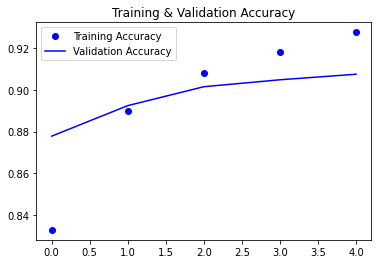

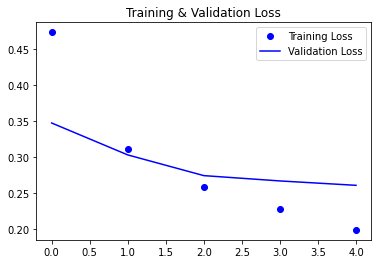

In [11]:
accuracy=prediction.history['accuracy']
val_accuracy=prediction.history['val_accuracy']
loss=prediction.history['loss']
val_loss=prediction.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title("Training & Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()
plt.show()

## Building  New Model

In [12]:
batch_size=100
epochs=20
n_classes=10

In [13]:
fashionmodel = Sequential()
fashionmodel.add(Conv2D(32 , kernel_size =(3 , 3) , activation='relu' , padding='same', input_shape =(28 ,28 ,1) ) )
fashionmodel.add(MaxPooling2D ( ( 2 , 2) , padding="same" ) )
fashionmodel.add(Conv2D(64 , ( 3 , 3) , activation='relu' , padding="same" ) )
fashionmodel.add(MaxPooling2D( (2 , 2) , padding='same' ) )
fashionmodel.add(Conv2D(128 , ( 3 , 3) , activation='relu' , padding='same' ) )
fashionmodel.add(MaxPooling2D((2 , 2) , padding='same' ) )
fashionmodel.add(Flatten() )
fashionmodel.add(Dense (128 ,activation='relu' ) )
fashionmodel.add(Dense ( n_classes ,activation='softmax' ) )
fashionmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

In [14]:
fashionmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
prediction=fashionmodel.fit(x_train,y_train,batch_size=100,epochs=20,verbose=0,validation_data=(X_valid,y_valid))

##Model Evaluation on  Test Set

In [15]:
evaluation=fashionmodel.evaluate(x_test,to_categorical(y_test),verbose=1)
print("Test Loss: ",evaluation[0])
print("Test Accuracy: ",evaluation[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.3949 - accuracy: 0.9157
Test Loss:  0.3948887884616852
Test Accuracy:  0.9157000184059143


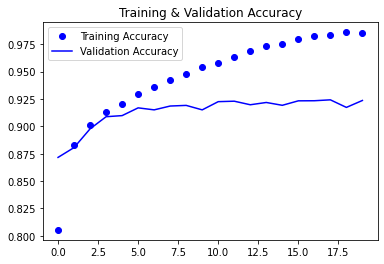

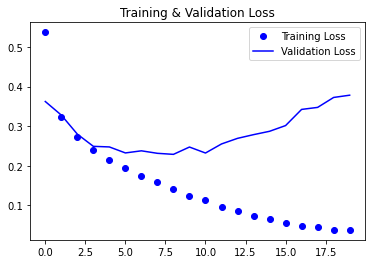

In [16]:
accuracy=prediction.history['accuracy']
val_accuracy=prediction.history['val_accuracy']
loss=prediction.history['loss']
val_loss=prediction.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title("Training & Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()
plt.show()

In [ ]:
predicted_classes=fashionmodel.predict(x_test)
predicted_classes=np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape,y_test.shape

313/313 [==============================] - 7s 22ms/step


((10000,), (10000,))

## Correctly predicted images

Found 7334 correct labels


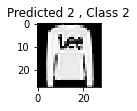

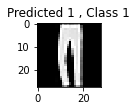

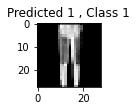

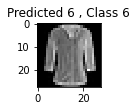

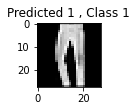

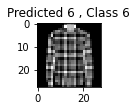

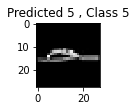

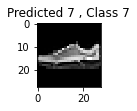

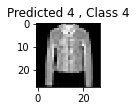

In [ ]:

correct=np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate( correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow( x_test[correct].reshape( 28 , 28 ) , cmap='gray' , interpolation='none')
    plt.title("Predicted {} , Class {}" .format(predicted_classes[correct],y_test[correct] ) )
    plt.show()

##Incorrectly predicted images

Found 2666 incorrect labels


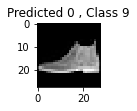

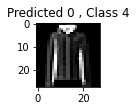

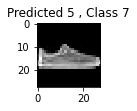

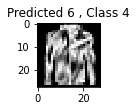

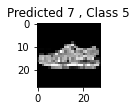

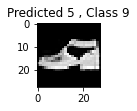

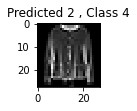

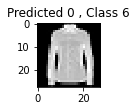

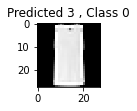

In [ ]:
incorrect=np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate( incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow( x_test[incorrect].reshape( 28 , 28 ) , cmap='gray' , interpolation='none')
    plt.title("Predicted {} , Class {}" .format(predicted_classes[incorrect],y_test[incorrect] ) )
    plt.show()

##Code Using Definition methods

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
import torch
import torchvision

In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 28
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.1,
                      momentum=momentum)

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('train_images', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('test_images', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting train_images/MNIST/raw/train-images-idx3-ubyte.gz to train_images/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting train_images/MNIST/raw/train-labels-idx1-ubyte.gz to train_images/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting train_images/MNIST/raw/t10k-images-idx3-ubyte.gz to train_images/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting train_images/MNIST/raw/t10k-labels-idx1-ubyte.gz to train_images/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting test_images/MNIST/raw/train-images-idx3-ubyte.gz to test_images/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting test_images/MNIST/raw/train-labels-idx1-ubyte.gz to test_images/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting test_images/MNIST/raw/t10k-images-idx3-ubyte.gz to test_images/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting test_images/MNIST/raw/t10k-labels-idx1-ubyte.gz to test_images/MNIST/raw



In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
# test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

<ipython-input-4-6c2218f37724>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.261890
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.233091
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.606303
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.076151
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.802985
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.691942
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.129568
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.709564
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.543057
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.728339
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.580196
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.717960
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.602795
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.508886
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.646001
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.552537
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.528103
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.380038
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.598374
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.509218
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0949, Accuracy: 9715/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.249392
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.159524
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.394765
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.127991
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.321314
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.202055
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.321377
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.440142
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.316461
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.299646
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.459277
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.481047
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.328561
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.426321
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.311067
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.344548
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.246851
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.336550
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.130170
Train Epoch: 2 [12160

Epochs-5 (SGD)

In [ ]:
n_epochs = 5
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 30
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.1,
                      momentum=momentum)

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
# test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

<ipython-input-12-6c2218f37724>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.326300
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.180050
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.827091
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.391901
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.109124
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.384529
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.020938
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.051032
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.653756
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.660236
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.678954
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.866633
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.938012
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.742369
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.686724
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.527129
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.640502
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.497711
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.498802
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.403741
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0836, Accuracy: 9755/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.334733
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.185972
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.252643
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.241336
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.319141
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.287025
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.293589
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.373666
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.326392
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.127129
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.136592
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.285775
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.073398
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.354325
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.206713
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.252221
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.137811
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.431150
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.304398
Train Epoch: 2 [12160

In [ ]:
n_epochs = 5
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 30
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
network = Net()
optimizer = optim.Adam(network.parameters(), lr=0.1
                      )

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
# test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

<ipython-input-19-6c2218f37724>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315328
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.285043
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.281353
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.315069
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.316213
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.301553
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.281407
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.311137
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.286035
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.301150
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.328529
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.312407
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.322015
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.319376
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.332146
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.329084
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.309356
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.321898
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.291728
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.314364
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3151, Accuracy: 892/10000 (9%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.297700
Train Epoch: 2 [640/60000 (1%)]	Loss: 2.306874
Train Epoch: 2 [1280/60000 (2%)]	Loss: 2.328158
Train Epoch: 2 [1920/60000 (3%)]	Loss: 2.310798
Train Epoch: 2 [2560/60000 (4%)]	Loss: 2.307980
Train Epoch: 2 [3200/60000 (5%)]	Loss: 2.317914
Train Epoch: 2 [3840/60000 (6%)]	Loss: 2.319395
Train Epoch: 2 [4480/60000 (7%)]	Loss: 2.318492
Train Epoch: 2 [5120/60000 (9%)]	Loss: 2.302048
Train Epoch: 2 [5760/60000 (10%)]	Loss: 2.325816
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.321159
Train Epoch: 2 [7040/60000 (12%)]	Loss: 2.325076
Train Epoch: 2 [7680/60000 (13%)]	Loss: 2.293680
Train Epoch: 2 [8320/60000 (14%)]	Loss: 2.302048
Train Epoch: 2 [8960/60000 (15%)]	Loss: 2.306566
Train Epoch: 2 [9600/60000 (16%)]	Loss: 2.318388
Train Epoch: 2 [10240/60000 (17%)]	Loss: 2.315409
Train Epoch: 2 [10880/60000 (18%)]	Loss: 2.321477
Train Epoch: 2 [11520/60000 (19%)]	Loss: 2.314198
Train Epoch: 2 [12160/6